# Binary Classification with a Bank Churn Dataset

## Import required libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Load Data

In [18]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

In [19]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [20]:
test_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


## Data Processing

In [21]:
# Drop unnecessary columns
train_data.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
test_data.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Geography', 'Gender']:
    combined = pd.concat([train_data[column], test_data[column]])
    label_encoder.fit(combined)
    train_data[column] = label_encoder.transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Separate features and target
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data)

## Model Training and Cross-Validation

In [22]:
logistic_model = LogisticRegression()
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
average_cv_score = cv_scores.mean()
print("Average CV Score:", average_cv_score)

Average CV Score: 0.8260661305190358


## Train Model on Full Dataset

In [23]:
logistic_model.fit(X_train_scaled, y_train)
churn_predictions = logistic_model.predict(X_test_scaled)
churn_predictions[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Exploratory Data Analysis

         CreditScore      Geography         Gender            Age  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean      656.454373       0.648545       0.564429      38.125888   
std        80.103340       0.816574       0.495833       8.867205   
min       350.000000       0.000000       0.000000      18.000000   
25%       597.000000       0.000000       0.000000      32.000000   
50%       659.000000       0.000000       1.000000      37.000000   
75%       710.000000       1.000000       1.000000      42.000000   
max       850.000000       2.000000       1.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean        5.020353   55478.086689       1.554455       0.753954   
std         2.806159   62817.663278       0.547154       0.430707   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.0000

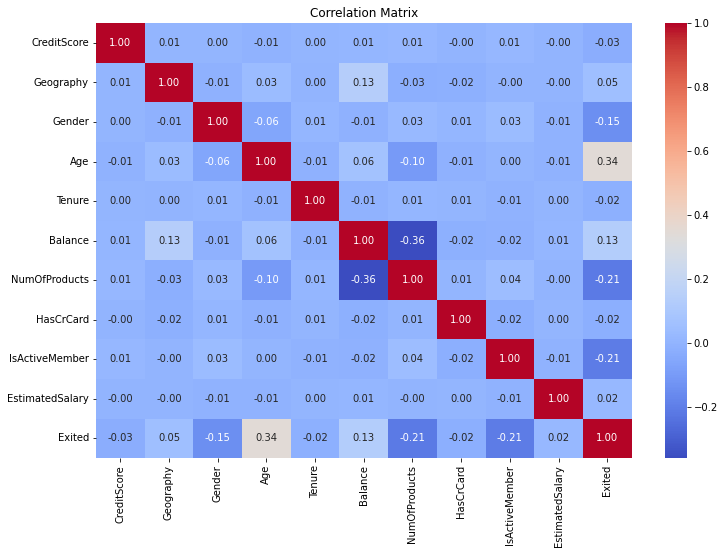

In [24]:
# Summary statistics
print(train_data.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Feature Importance Analysis

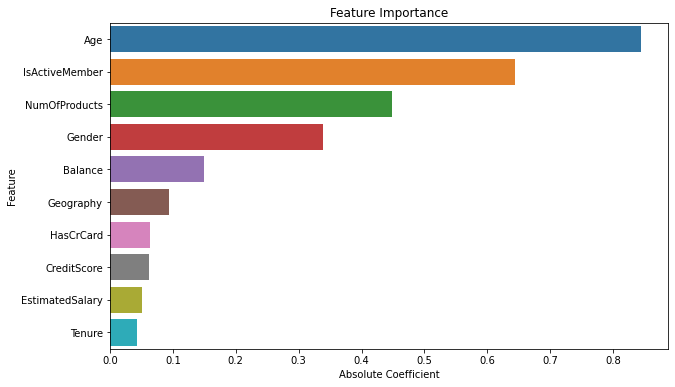

In [25]:
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

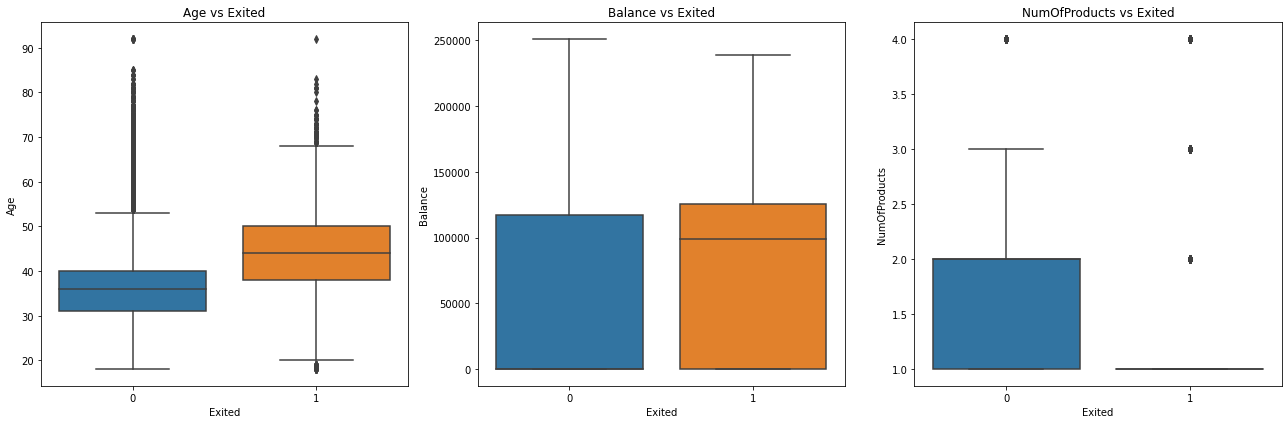

In [26]:
# Box plots for Age, Balance, and NumOfProducts against Exited status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting each box plot
sns.boxplot(x='Exited', y='Age', data=train_data, ax=axes[0])
axes[0].set_title('Age vs Exited')

sns.boxplot(x='Exited', y='Balance', data=train_data, ax=axes[1])
axes[1].set_title('Balance vs Exited')

sns.boxplot(x='Exited', y='NumOfProducts', data=train_data, ax=axes[2])
axes[2].set_title('NumOfProducts vs Exited')

plt.tight_layout()
plt.show()

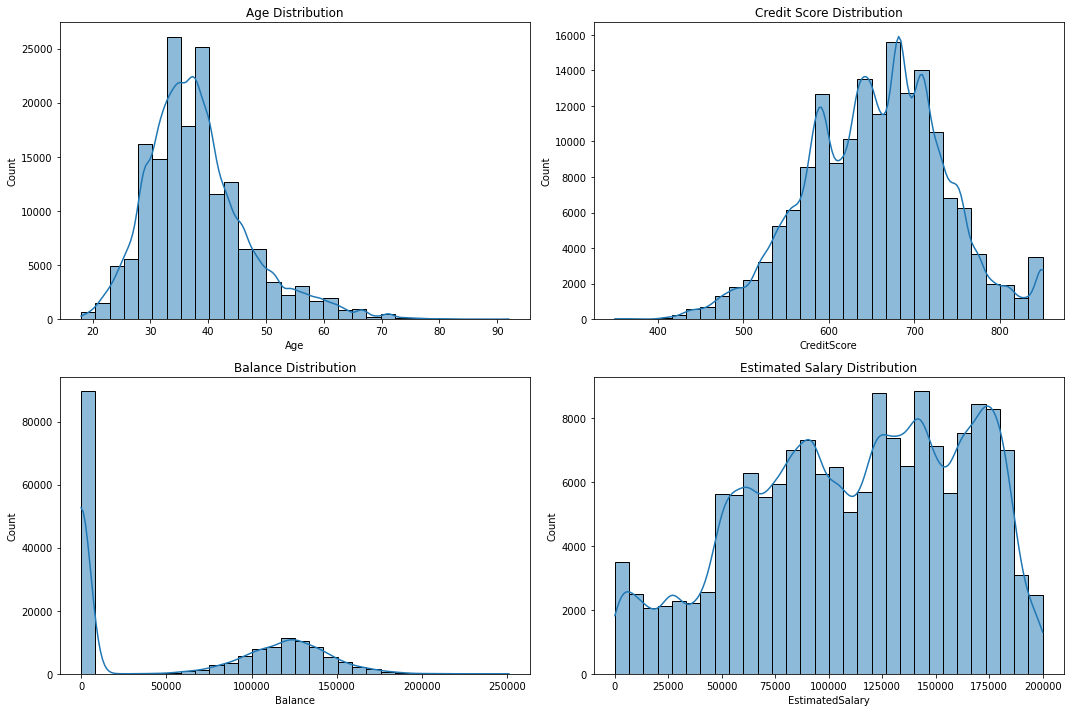

In [27]:
# Histograms for Age, CreditScore, Balance, and EstimatedSalary
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each histogram
sns.histplot(train_data['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(train_data['CreditScore'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score Distribution')

sns.histplot(train_data['Balance'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

sns.histplot(train_data['EstimatedSalary'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

## Save Predictions

In [30]:
# Save predictions to a CSV file
predictions_df = pd.DataFrame(churn_predictions, columns=['Churn_Prediction'])
predictions_df.to_csv('churn_predictions.csv', index=False)

In [31]:
predictions_df

,Churn_Prediction
0,0
1,1
2,0
3,0
4,0
...,...
110018,0
110019,0
110020,0
110021,0
